# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business Objective:

The primary business objective is to develop a predictive model that identifies which clients are most likely to subscribe to a term deposit in response to marketing campaigns. By leveraging historical data on client demographics, job types, marital status, education levels, financial information, and previous contact details, the goal is to:

Improve Targeting: Focus marketing efforts on clients with a higher probability of subscription, thereby increasing the efficiency and effectiveness of marketing campaigns.
Enhance Resource Allocation: Optimize the allocation of marketing resources by reducing the number of unnecessary contacts to clients who are less likely to respond positively.
Increase Conversion Rates: Achieve a higher rate of successful term deposit subscriptions, contributing to increased revenue and customer acquisition for the banking institution.
Reduce Costs: Lower the cost per acquisition by identifying and targeting only those clients who are more likely to convert, leading to a better return on investment for marketing expenditures.

Overall, the objective is to use predictive analytics to make data-driven decisions that enhance the success of marketing strategies and improve business outcomes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

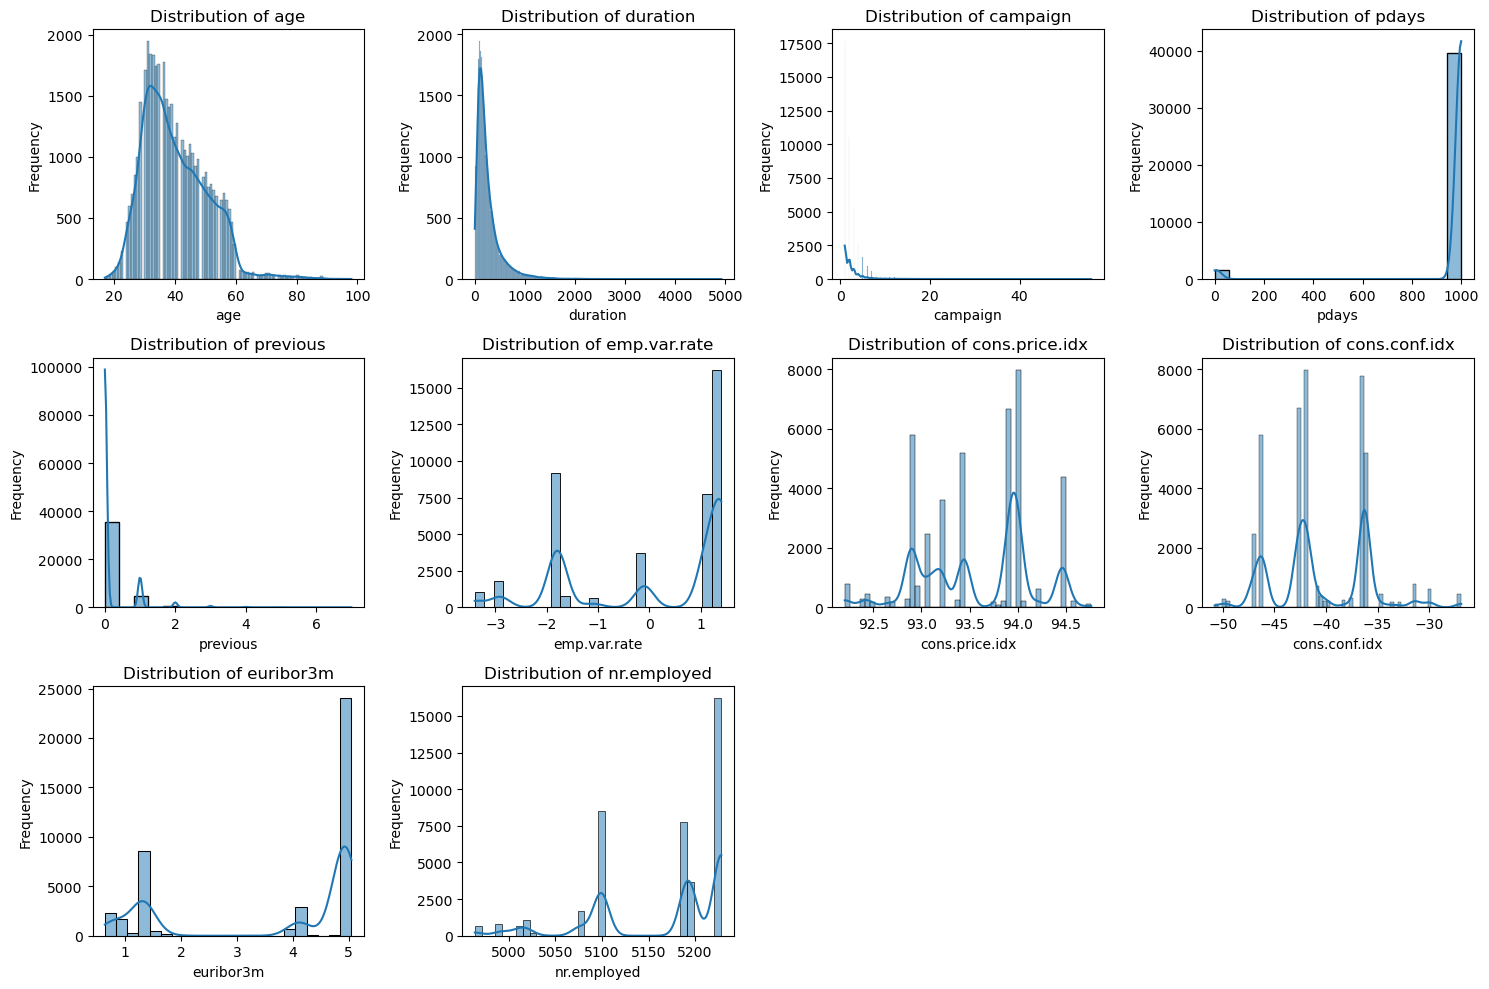

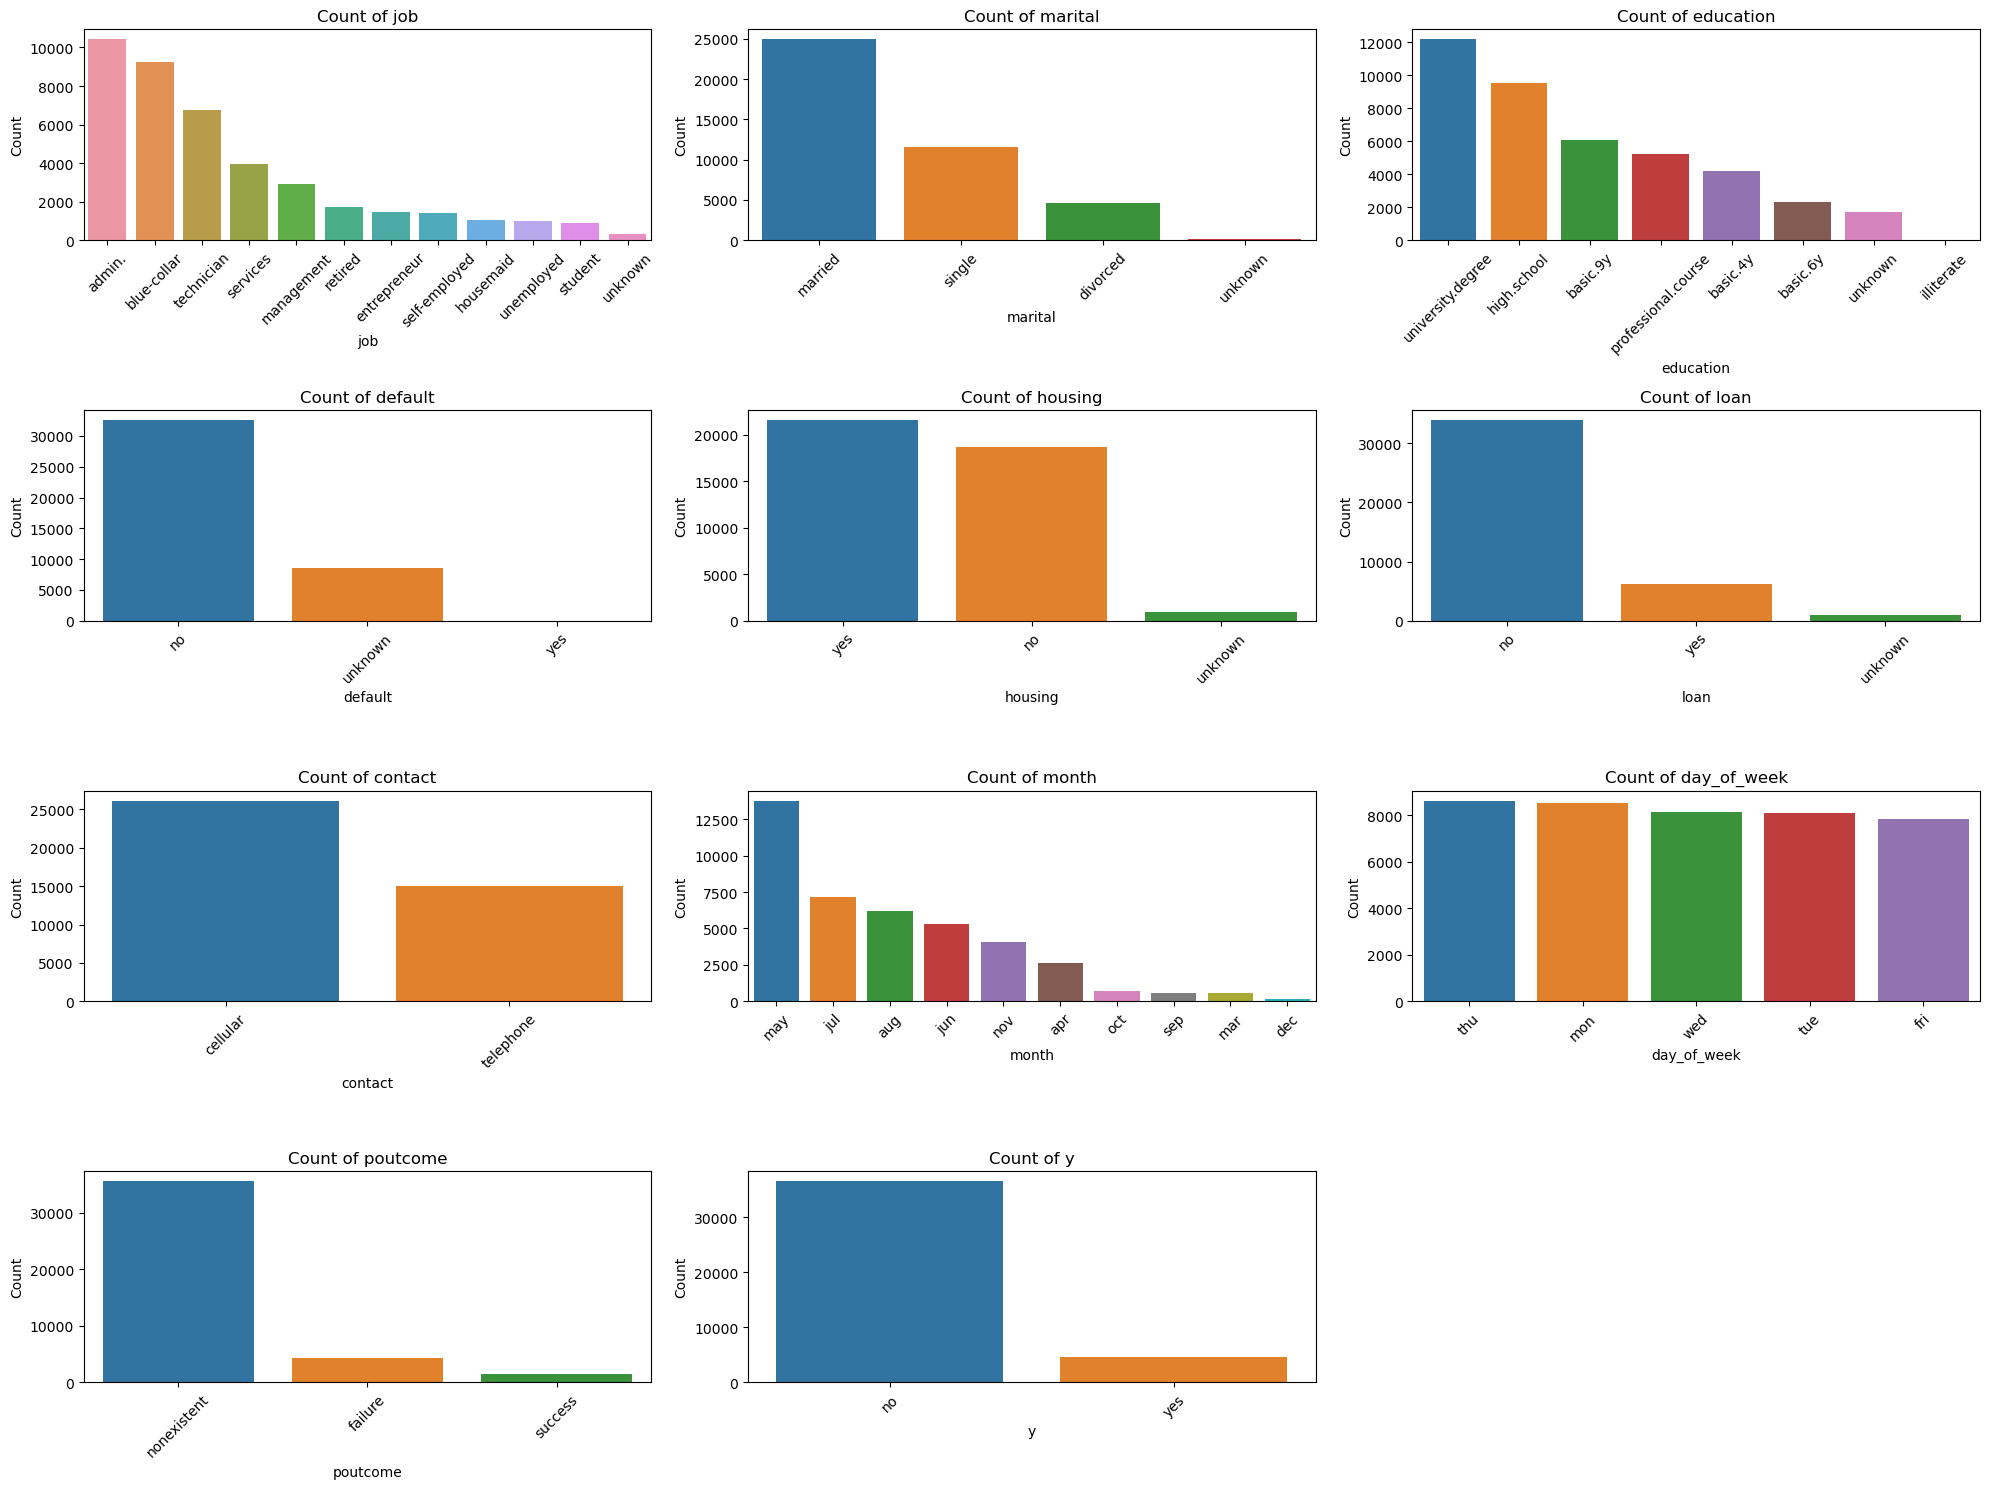

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

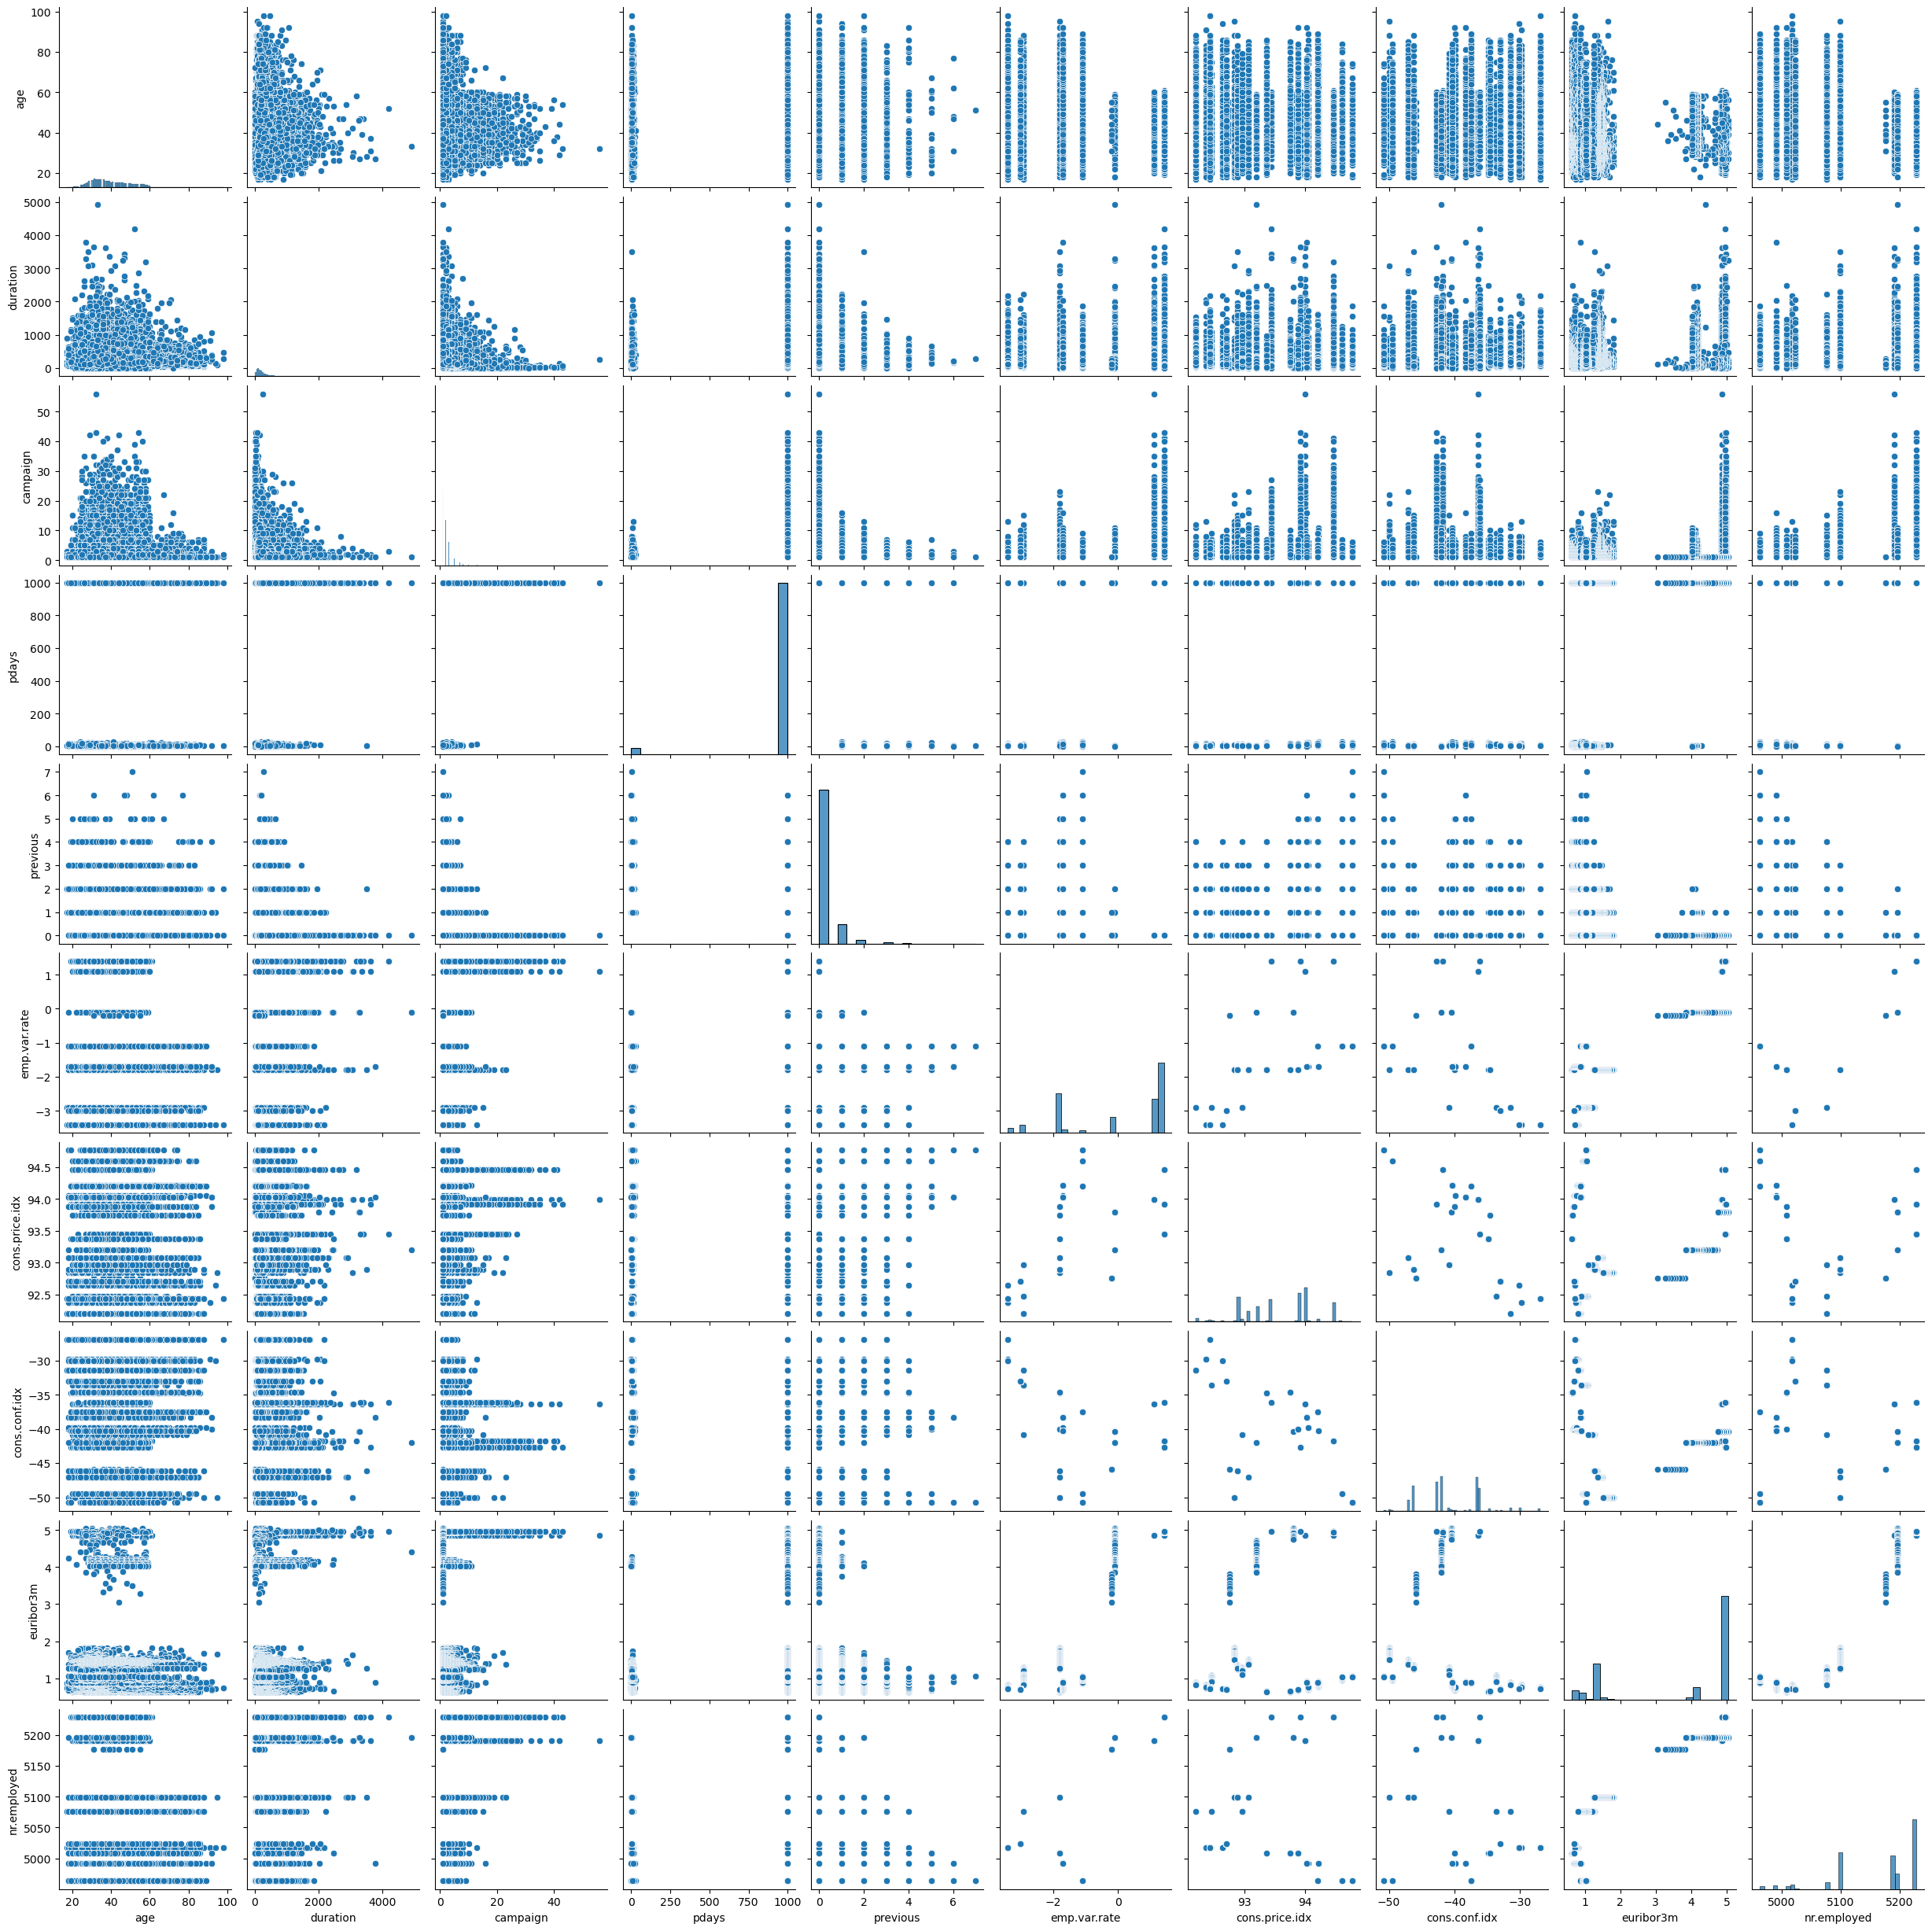

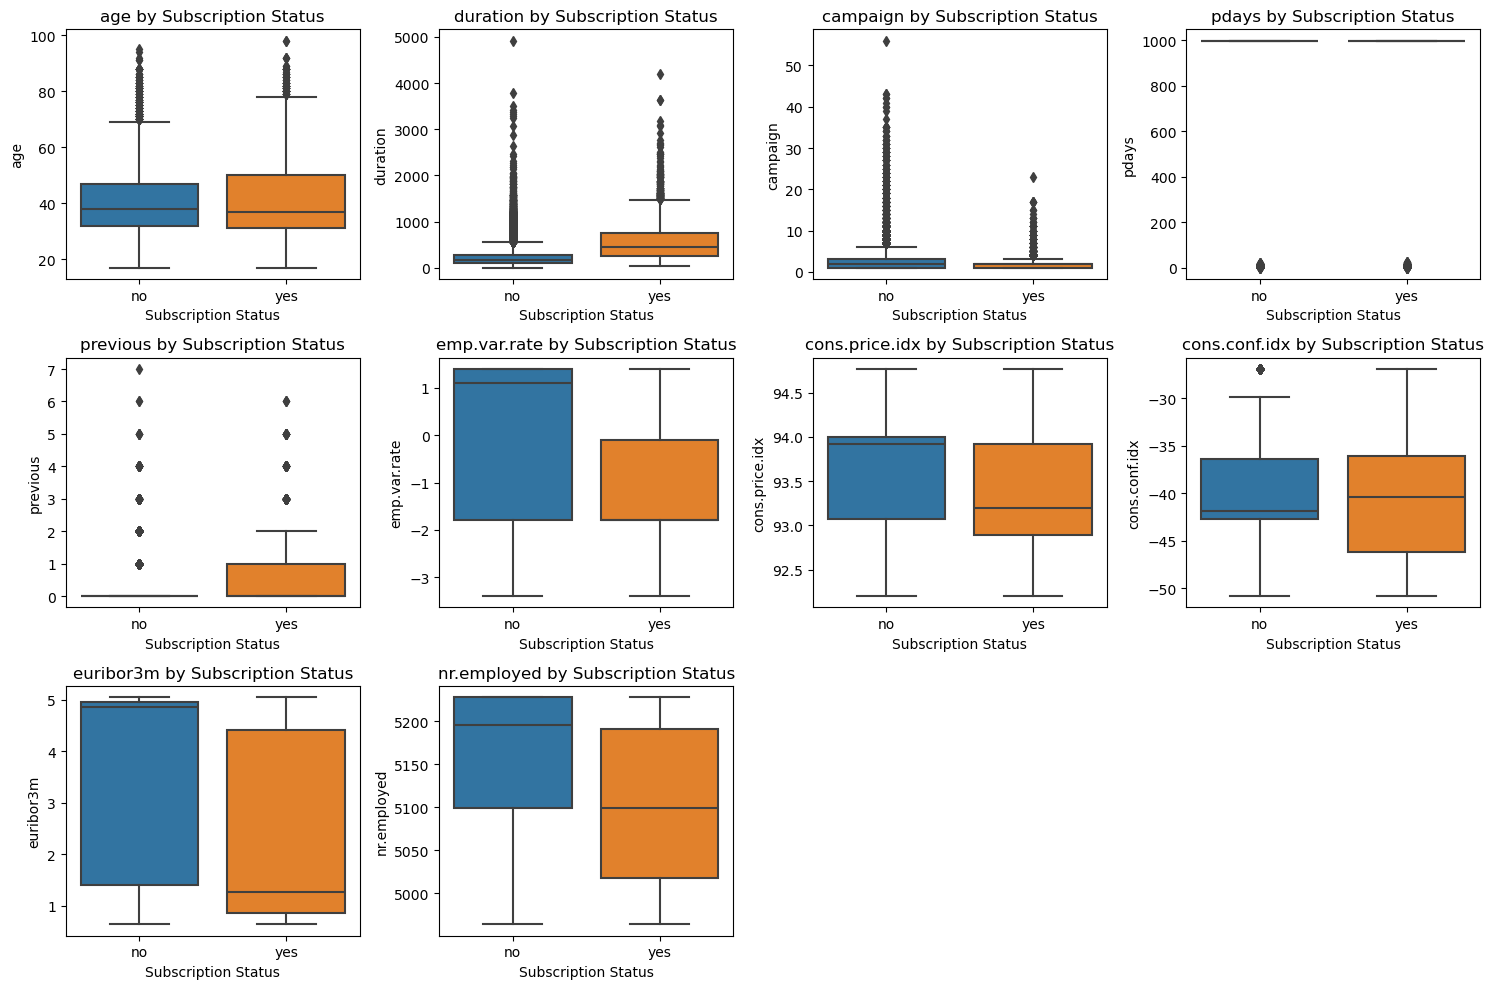

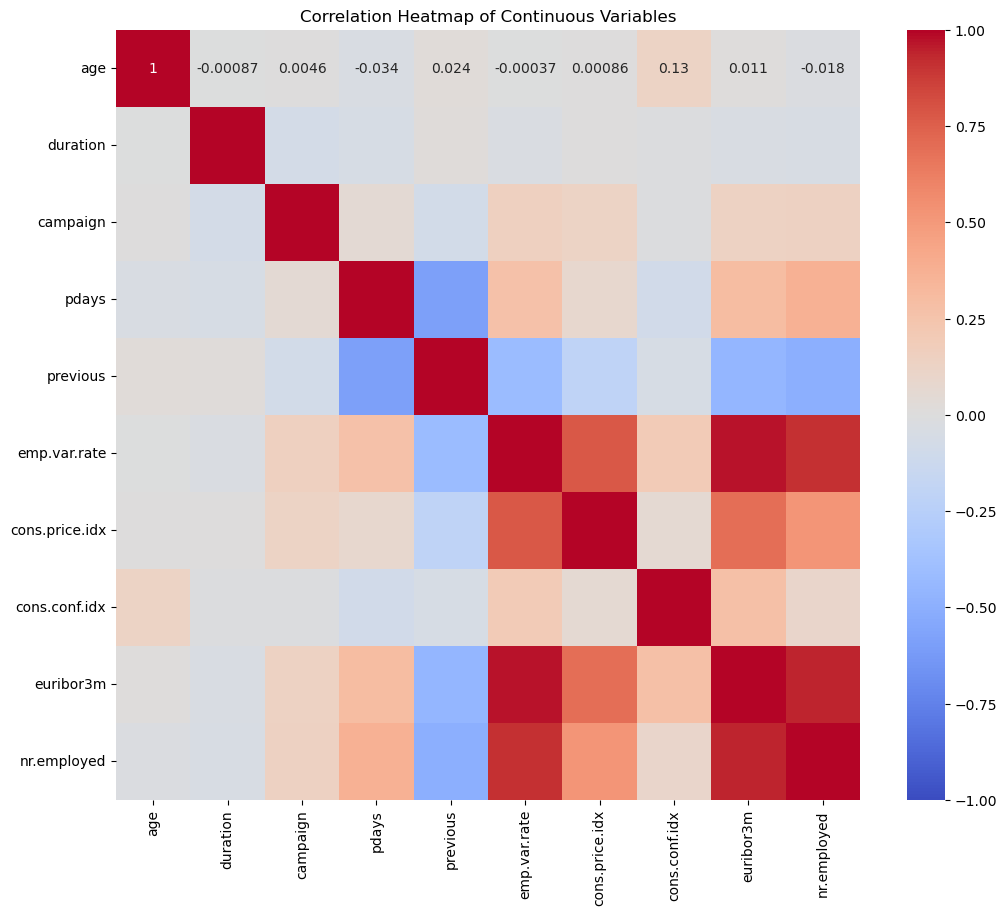

<Figure size 1000x600 with 0 Axes>

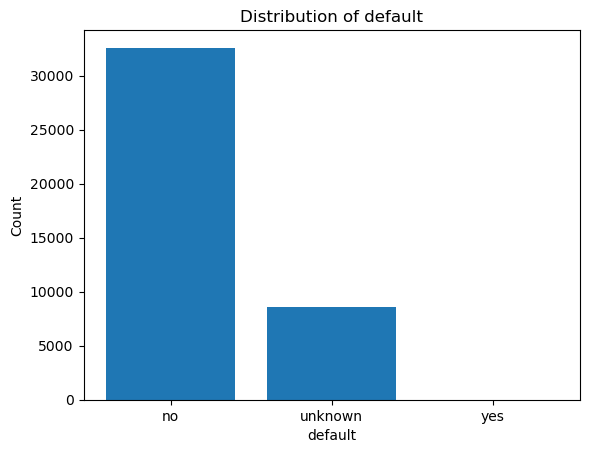

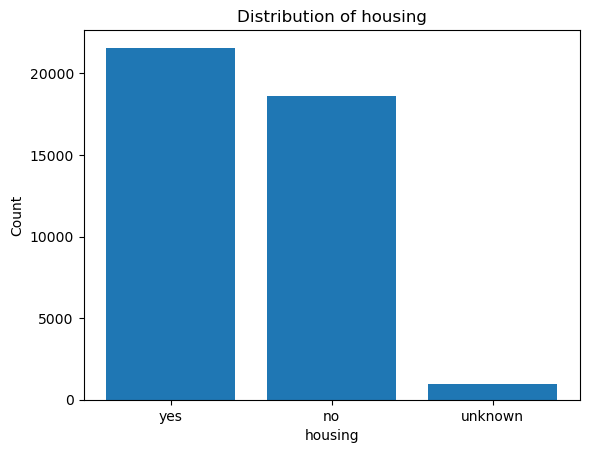

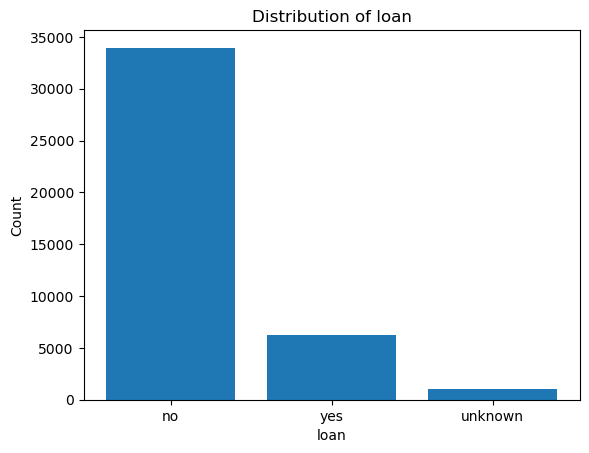

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous variables
continuous_vars = ['age', 'duration', 'campaign', 'pdays', 'previous',
                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                    'euribor3m', 'nr.employed']

# Categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing',
                     'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Plot histograms for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot count plots for categorical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=var, data=df, order=df[var].value_counts().index)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot pairplot for continuous variables
sns.pairplot(df[continuous_vars])
plt.show()

# Plot boxplots for continuous variables by categorical target
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='y', y=var, data=df)
    plt.title(f'{var} by Subscription Status')
    plt.xlabel('Subscription Status')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# Plot correlation heatmap for continuous variables
plt.figure(figsize=(12, 10))
correlation_matrix = df[continuous_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

# Plot bar plots for binary categorical variables
binary_categorical_vars = ['default', 'housing', 'loan']

plt.figure(figsize=(10, 6))
for var in binary_categorical_vars:
    plt.figure()
    plt.bar(df[var].value_counts().index, df[var].value_counts())
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the target variable
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Drop the target column from features
X = df.drop(columns=['y'])

# Define feature types
categorical_features = ['job', 'marital', 'education', 'contact', 'day_of_week', 'month']
binary_features = ['default', 'housing', 'loan']
numerical_features = ['age']

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
            ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), categorical_features),
        ('bin', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
            ('onehot', OneHotEncoder(drop='if_binary'))  # Encode binary features
        ]), binary_features)
    ],
    remainder='passthrough',  # Ensure other columns are passed through
    sparse_threshold=0  # Ensure dense output
)

# Prepare the features
X_prepared = preprocessor.fit_transform(X)

# Convert the transformed features to DataFrame
X_prepared_df = pd.DataFrame(X_prepared)

# Original column names before cleaning
original_columns = X.columns

# Identify non-numeric columns
non_numeric_columns = X_prepared_df.applymap(lambda x: not isinstance(x, (int, float))).any()
non_numeric_column_names = X_prepared_df.columns[non_numeric_columns]

# Drop columns with non-numeric values
X_prepared_df_cleaned = X_prepared_df.loc[:, ~non_numeric_columns]

# Print all non-numeric columns dropped
print("Dropped non-numeric columns:")
for col in non_numeric_column_names:
    print(col)

# Check if any non-numeric values remain
if X_prepared_df_cleaned.shape[1] == X_prepared_df.shape[1]:
    print("All columns are numeric and ready for model training.")
else:
    print("Dropped non-numeric columns.")


/var/folders/87/7j46lljd6dg9j_lr37l9ghbr0000gn/T/ipykernel_63741/1719248873.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_columns = X_prepared_df.applymap(lambda x: not isinstance(x, (int, float))).any()


Dropped non-numeric columns:
49
Dropped non-numeric columns.


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared_df_cleaned, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)




Training set shape: (32950, 54) (32950,)
Test set shape: (8238, 54) (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Initialize the dummy classifier with the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dummy = dummy_clf.predict(X_test)

# Calculate accuracy
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Baseline Accuracy with Dummy Classifier: {dummy_accuracy:.2f}")


Baseline Accuracy with Dummy Classifier: 0.89


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:


# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
log_reg



LogisticRegression(max_iter=1000, random_state=42)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


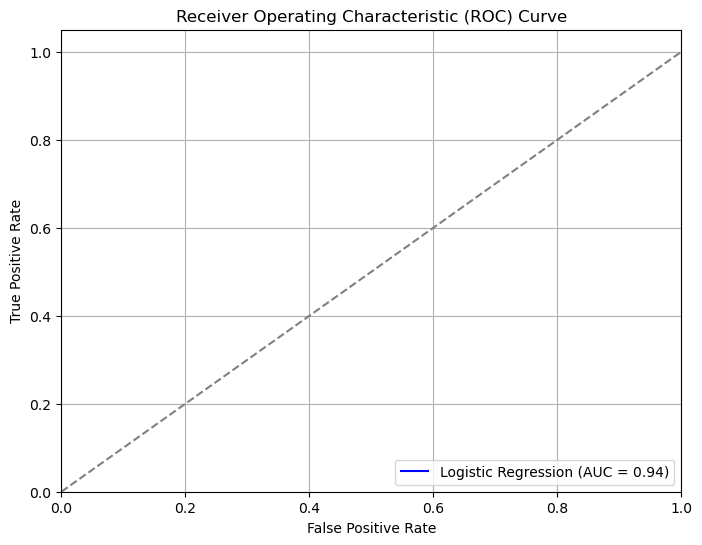

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Make predictions on the test set
y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='yes')  # Assuming 'yes' is the positive class
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Problem 9: Score the Model

What is the accuracy of your model?

Accuracy: 0.90
Confusion Matrix:
[[7207  103]
 [ 737  191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7310
           1       0.65      0.21      0.31       928

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



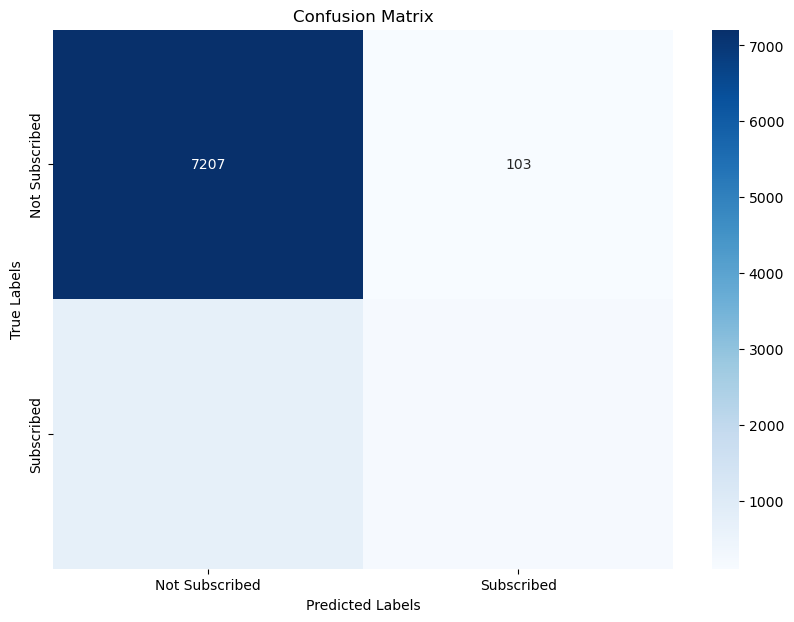

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Fit Time (s)', 'Accuracy'])

# Fit and evaluate each model
model_results = []
for model_name, model in models.items():
    # Measure fit time
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Append results to list
    model_results.append({
        'Model': model_name,
        'Fit Time (s)': fit_time,
        'Accuracy': accuracy
    })

# Convert results list to DataFrame
results = pd.DataFrame(model_results)

# Display results
print(results)

                 Model  Fit Time (s)  Accuracy
0  Logistic Regression      0.767841  0.913328
1                  KNN      0.074004  0.904467
2        Decision Tree      0.243203  0.894756
3                  SVM     20.957274  0.898034


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


                 Model  Fit Time (s)  Accuracy
0  Logistic Regression      0.778291  0.913328
1                  KNN      0.067817  0.904467
2        Decision Tree      0.294291  0.894756
3                  SVM    193.712257  0.898034


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


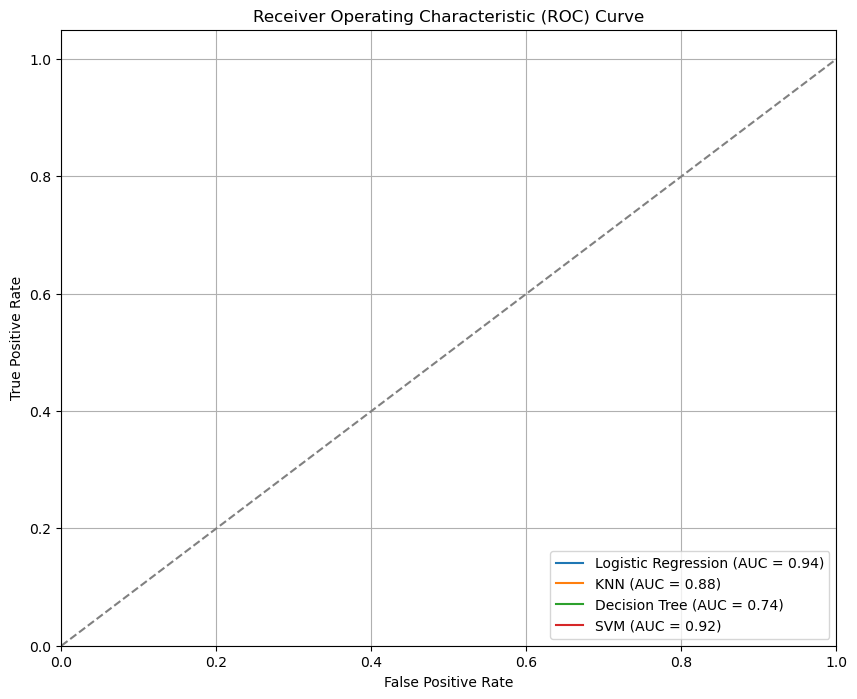

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)  # Set probability=True to get predicted probabilities
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Fit Time (s)', 'Accuracy'])

# Initialize a dictionary to store ROC data
roc_data = {}

# Fit and evaluate each model
model_results = []
for model_name, model in models.items():
    # Measure fit time
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Compute predicted probabilities
    if model_name == 'SVM':
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='yes')  # Adjust pos_label as needed
    roc_auc = roc_auc_score(y_test, y_proba)

    # Store ROC data
    roc_data[model_name] = (fpr, tpr, roc_auc)

    # Append results to list
    model_results.append({
        'Model': model_name,
        'Fit Time (s)': fit_time,
        'Accuracy': accuracy
    })

# Convert results list to DataFrame
results = pd.DataFrame(model_results)

# Display results
print(results)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define parameter distributions for RandomizedSearchCV
param_distributions_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}

param_distributions_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_distributions_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Initialize models
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
svm = SVC()

# Initialize RandomizedSearchCV
random_knn = RandomizedSearchCV(knn, param_distributions=param_distributions_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_tree = RandomizedSearchCV(tree, param_distributions=param_distributions_tree, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_svm = RandomizedSearchCV(svm, param_distributions=param_distributions_svm, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_knn.fit(X_train, y_train)
random_tree.fit(X_train, y_train)
random_svm.fit(X_train, y_train)

# Print best parameters
print("Best parameters for KNN:", random_knn.best_params_)
print("Best parameters for Decision Tree:", random_tree.best_params_)
print("Best parameters for SVM:", random_svm.best_params_)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 10}
Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Best parameters for SVM: {'kernel': 'linear', 'gamma': 1, 'C': 1}


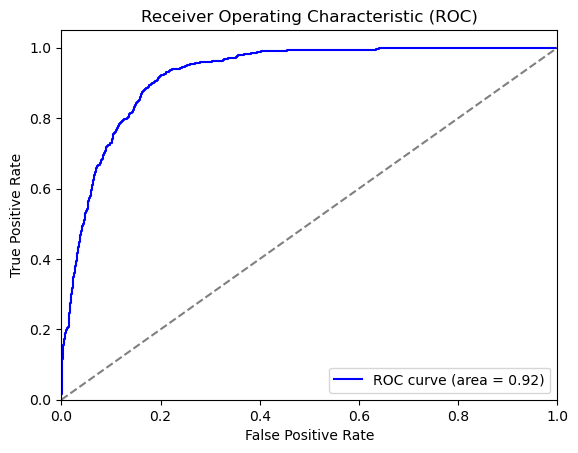

Confusion Matrix:
[[7207  103]
 [ 737  191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7310
           1       0.65      0.21      0.31       928

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for ROC curve
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


##### Questions